In [1]:
#writing some conda package or module
#!pip install netCDF4
%matplotlib inline
import warnings
from netCDF4 import Dataset
import numpy as np
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt
#!pip install cartopy
import cartopy.feature as cfeature
import cartopy.crs as ccrs
import cartopy.mpl.ticker as cticker
from cartopy.util import add_cyclic_point


In [2]:
data = xr.open_dataset('/home/mkibria/Academic/pr_of_thesis/GCM/Noresm1-M/pr_Amon_NorESM1-M_historical_r1i1p1_185001-200512.nc')

data

<xarray.Dataset>
Dimensions:    (time: 1872, bnds: 2, lat: 96, lon: 144)
Coordinates:
  * time       (time) object 1850-01-16 12:00:00 ... 2005-12-16 12:00:00
  * lat        (lat) float64 -90.0 -88.11 -86.21 -84.32 ... 86.21 88.11 90.0
  * lon        (lon) float64 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5
Dimensions without coordinates: bnds
Data variables:
    time_bnds  (time, bnds) object ...
    lat_bnds   (lat, bnds) float64 ...
    lon_bnds   (lon, bnds) float64 ...
    pr         (time, lat, lon) float32 ...
Attributes: (12/26)
    institution:            Norwegian Climate Centre
    institute_id:           NCC
    experiment_id:          historical
    source:                 NorESM1-M 2011  atmosphere: CAM-Oslo (CAM4-Oslo-n...
    model_id:               NorESM1-M
    forcing:                GHG, SA, Oz, Sl, Vl, BC, OC
    ...                     ...
    table_id:               Table Amon (27 April 2011) a5a1c518f52ae340313ba0...
    title:                  NorESM1-M model output prepared for CMIP5 historical
    parent_experiment:      pre-industrial control
    modeling_realm:         atmos
    realization:            1
    cmor_version:           2.6.0

In [3]:
#changing time dim to datetime64[ns] dtype

datetimeindex = data.indexes['time'].to_datetimeindex()
data['time']=datetimeindex
data

/home/mkibria/miniconda3/envs/esp-sp/lib/python3.9/site-packages/xarray/coding/times.py:351: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  sample = dates.ravel()[0]
/tmp/ipykernel_4236/1463838701.py:3: RuntimeWarning: Converting a CFTimeIndex with dates from a non-standard calendar, 'noleap', to a pandas.DatetimeIndex, which uses dates from the standard calendar.  This may lead to subtle errors in operations that depend on the length of time between dates.
  datetimeindex = data.indexes['time'].to_datetimeindex()


<xarray.Dataset>
Dimensions:    (time: 1872, bnds: 2, lat: 96, lon: 144)
Coordinates:
  * time       (time) datetime64[ns] 1850-01-16T12:00:00 ... 2005-12-16T12:00:00
  * lat        (lat) float64 -90.0 -88.11 -86.21 -84.32 ... 86.21 88.11 90.0
  * lon        (lon) float64 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5
Dimensions without coordinates: bnds
Data variables:
    time_bnds  (time, bnds) object 1850-01-01 00:00:00 ... 2006-01-01 00:00:00
    lat_bnds   (lat, bnds) float64 -90.0 -89.05 -89.05 ... 89.05 89.05 90.0
    lon_bnds   (lon, bnds) float64 -1.25 1.25 1.25 3.75 ... 356.2 356.2 358.8
    pr         (time, lat, lon) float32 ...
Attributes: (12/26)
    institution:            Norwegian Climate Centre
    institute_id:           NCC
    experiment_id:          historical
    source:                 NorESM1-M 2011  atmosphere: CAM-Oslo (CAM4-Oslo-n...
    model_id:               NorESM1-M
    forcing:                GHG, SA, Oz, Sl, Vl, BC, OC
    ...                     ...
    table_id:               Table Amon (27 April 2011) a5a1c518f52ae340313ba0...
    title:                  NorESM1-M model output prepared for CMIP5 historical
    parent_experiment:      pre-industrial control
    modeling_realm:         atmos
    realization:            1
    cmor_version:           2.6.0

In [4]:
#to select the year from 1980 to 2015
data = data.sel(time=slice('1980-01-16T12:00:00.000000000','2005-12-16T00:00:00.000000000'))
data

<xarray.Dataset>
Dimensions:    (time: 311, bnds: 2, lat: 96, lon: 144)
Coordinates:
  * time       (time) datetime64[ns] 1980-01-16T12:00:00 ... 2005-11-16
  * lat        (lat) float64 -90.0 -88.11 -86.21 -84.32 ... 86.21 88.11 90.0
  * lon        (lon) float64 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5
Dimensions without coordinates: bnds
Data variables:
    time_bnds  (time, bnds) object 1980-01-01 00:00:00 ... 2005-12-01 00:00:00
    lat_bnds   (lat, bnds) float64 -90.0 -89.05 -89.05 ... 89.05 89.05 90.0
    lon_bnds   (lon, bnds) float64 -1.25 1.25 1.25 3.75 ... 356.2 356.2 358.8
    pr         (time, lat, lon) float32 ...
Attributes: (12/26)
    institution:            Norwegian Climate Centre
    institute_id:           NCC
    experiment_id:          historical
    source:                 NorESM1-M 2011  atmosphere: CAM-Oslo (CAM4-Oslo-n...
    model_id:               NorESM1-M
    forcing:                GHG, SA, Oz, Sl, Vl, BC, OC
    ...                     ...
    table_id:               Table Amon (27 April 2011) a5a1c518f52ae340313ba0...
    title:                  NorESM1-M model output prepared for CMIP5 historical
    parent_experiment:      pre-industrial control
    modeling_realm:         atmos
    realization:            1
    cmor_version:           2.6.0

In [5]:
#selecting only JJAS months

def is_jjas(month):
    return (month >= 6) & (month <= 9)

jjas_data = data.sel(time=is_jjas(data['time.month']))

jjas_data

<xarray.Dataset>
Dimensions:    (time: 104, bnds: 2, lat: 96, lon: 144)
Coordinates:
  * time       (time) datetime64[ns] 1980-06-16 ... 2005-09-16
  * lat        (lat) float64 -90.0 -88.11 -86.21 -84.32 ... 86.21 88.11 90.0
  * lon        (lon) float64 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5
Dimensions without coordinates: bnds
Data variables:
    time_bnds  (time, bnds) object 1980-06-01 00:00:00 ... 2005-10-01 00:00:00
    lat_bnds   (lat, bnds) float64 -90.0 -89.05 -89.05 ... 89.05 89.05 90.0
    lon_bnds   (lon, bnds) float64 -1.25 1.25 1.25 3.75 ... 356.2 356.2 358.8
    pr         (time, lat, lon) float32 ...
Attributes: (12/26)
    institution:            Norwegian Climate Centre
    institute_id:           NCC
    experiment_id:          historical
    source:                 NorESM1-M 2011  atmosphere: CAM-Oslo (CAM4-Oslo-n...
    model_id:               NorESM1-M
    forcing:                GHG, SA, Oz, Sl, Vl, BC, OC
    ...                     ...
    table_id:               Table Amon (27 April 2011) a5a1c518f52ae340313ba0...
    title:                  NorESM1-M model output prepared for CMIP5 historical
    parent_experiment:      pre-industrial control
    modeling_realm:         atmos
    realization:            1
    cmor_version:           2.6.0

In [6]:
#data["pr"]["x"][379:429].values
#data["pr"]["y"][237:337].values
#data["pr"]["time"].values
#jjas_data["pr"]["lat"][:].values

#jjas_data["pr"]["lon"][:].values


#data["pr"]["x"].values

#data.x

In [7]:
#data["pr"]["y"][287:337].values

In [8]:
#to select the x and y coordinates
#jjas_data = jjas_data.sel(x=slice(4125000.,5350000.),y=slice(2975000.,4200000.))
#jjas_data

In [9]:
#getting the mean for JJAS data
jjas_mean = jjas_data.pr.mean('time')
 
jjas_mean 

<xarray.DataArray 'pr' (lat: 96, lon: 144)>
array([[2.86553245e-06, 2.86553245e-06, 2.86553245e-06, ...,
        2.86553245e-06, 2.86553245e-06, 2.86553245e-06],
       [2.37474751e-06, 2.30935916e-06, 2.25411691e-06, ...,
        2.58556383e-06, 2.51142797e-06, 2.43031332e-06],
       [2.62944127e-06, 2.47334378e-06, 2.34476101e-06, ...,
        3.12961538e-06, 2.96016901e-06, 2.79037931e-06],
       ...,
       [1.02811473e-05, 1.03245493e-05, 1.03795555e-05, ...,
        9.97166444e-06, 1.00434127e-05, 1.01319993e-05],
       [1.05425843e-05, 1.05515355e-05, 1.05893869e-05, ...,
        1.04906740e-05, 1.05149074e-05, 1.05181371e-05],
       [8.45677187e-06, 8.45825070e-06, 8.45922386e-06, ...,
        8.45326304e-06, 8.45429076e-06, 8.45522391e-06]], dtype=float32)
Coordinates:
  * lat      (lat) float64 -90.0 -88.11 -86.21 -84.32 ... 84.32 86.21 88.11 90.0
  * lon      (lon) float64 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5

The pr is given in kg m $^{-2}$  s $^{-1}$ so we have to convert it into mm/day.

The formula is 1 kgm$^{-2}$ s$^{-1}$  = 86400 mm/day. 

so we have to divide pr value by 86400

 

In [10]:
pr_mm = jjas_mean*86400
pr_mm

<xarray.DataArray 'pr' (lat: 96, lon: 144)>
array([[0.247582  , 0.247582  , 0.247582  , ..., 0.247582  , 0.247582  ,
        0.247582  ],
       [0.20517818, 0.19952863, 0.1947557 , ..., 0.22339272, 0.21698738,
        0.20997907],
       [0.22718373, 0.2136969 , 0.20258735, ..., 0.27039877, 0.2557586 ,
        0.24108877],
       ...,
       [0.88829113, 0.89204106, 0.8967936 , ..., 0.86155181, 0.86775085,
        0.87540474],
       [0.91087928, 0.91165267, 0.91492303, ..., 0.90639423, 0.908488  ,
        0.90876704],
       [0.73066509, 0.73079286, 0.73087694, ..., 0.73036193, 0.73045072,
        0.73053135]])
Coordinates:
  * lat      (lat) float64 -90.0 -88.11 -86.21 -84.32 ... 84.32 86.21 88.11 90.0
  * lon      (lon) float64 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5

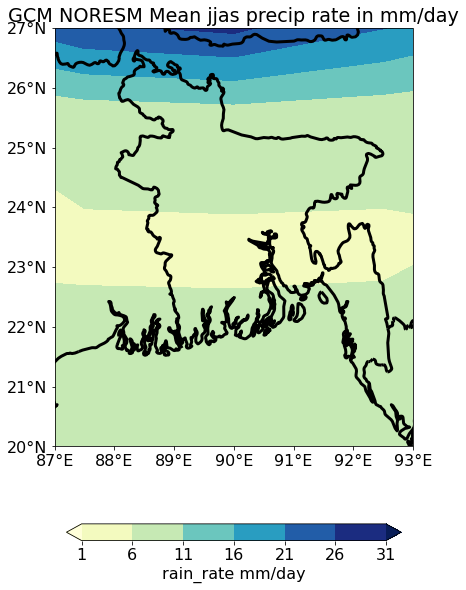

In [11]:
#plotting with cartopy jjas_pr_mean
import cartopy.feature as cfeature

plt.rcParams['font.size'] = '16'



fig = plt.figure(figsize=(12,9.5))

ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_extent([88,93,20,27])


 
m1 = ax.contourf(pr_mm['lon'][:], pr_mm['lat'][:],pr_mm,
                 np.arange(1,35+1,5),transform = ccrs.PlateCarree(),cmap='YlGnBu',extend='both')




# Define the xticks for longitude
ax.set_xticks(np.arange(87,94,1), crs=ccrs.PlateCarree())
lon_formatter = cticker.LongitudeFormatter()
ax.xaxis.set_major_formatter(lon_formatter)

# Define the yticks for latitude
ax.set_yticks(np.arange(20,28,1), crs=ccrs.PlateCarree())
lat_formatter = cticker.LatitudeFormatter()
ax.yaxis.set_major_formatter(lat_formatter)




plt.colorbar(m1, orientation = 'horizontal',shrink=0.5, fraction = 0.04 , label = 'rain_rate mm/day')
ax.coastlines(linewidth=3)
ax.add_feature(cfeature.BORDERS,linewidth=3)

plt.title('GCM NORESM Mean jjas precip rate in mm/day')
plt.savefig("/home/mkibria/Academic/pr_of_thesis/figures/bd_pr_gcm_noresm_jjas_mean.png")




Now I will plot the annual precipitation rate in mm/day

In [12]:
annual_mean = data.pr.mean('time')
annual_mean

<xarray.DataArray 'pr' (lat: 96, lon: 144)>
array([[2.3023686e-06, 2.3023797e-06, 2.3023613e-06, ..., 2.3023911e-06,
        2.3023606e-06, 2.3023763e-06],
       [1.9096178e-06, 1.8589204e-06, 1.8230509e-06, ..., 2.0575335e-06,
        2.0036882e-06, 1.9532633e-06],
       [2.1945054e-06, 2.0708278e-06, 1.9628710e-06, ..., 2.5592271e-06,
        2.4422425e-06, 2.3113262e-06],
       ...,
       [8.2592796e-06, 8.3086770e-06, 8.3692694e-06, ..., 8.0006403e-06,
        8.0971149e-06, 8.1743947e-06],
       [7.8803787e-06, 7.9155270e-06, 7.9581168e-06, ..., 7.7496925e-06,
        7.8018775e-06, 7.8437533e-06],
       [6.1508385e-06, 6.1515793e-06, 6.1520932e-06, ..., 6.1494106e-06,
        6.1498904e-06, 6.1502324e-06]], dtype=float32)
Coordinates:
  * lat      (lat) float64 -90.0 -88.11 -86.21 -84.32 ... 84.32 86.21 88.11 90.0
  * lon      (lon) float64 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5

In [13]:
#converting from kgm-2s-2 to mm/day

annual_pr_mm = annual_mean*86400
annual_pr_mm

<xarray.DataArray 'pr' (lat: 96, lon: 144)>
array([[0.19892464, 0.19892561, 0.19892401, ..., 0.19892659, 0.19892396,
        0.19892531],
       [0.16499098, 0.16061072, 0.15751159, ..., 0.17777089, 0.17311866,
        0.16876195],
       [0.18960527, 0.17891952, 0.16959206, ..., 0.22111723, 0.21100975,
        0.19969858],
       ...,
       [0.71360176, 0.71786969, 0.72310487, ..., 0.69125532, 0.69959073,
        0.7062677 ],
       [0.68086472, 0.68390153, 0.68758129, ..., 0.66957343, 0.67408221,
        0.67770029],
       [0.53143245, 0.53149645, 0.53154085, ..., 0.53130908, 0.53135053,
        0.53138008]])
Coordinates:
  * lat      (lat) float64 -90.0 -88.11 -86.21 -84.32 ... 84.32 86.21 88.11 90.0
  * lon      (lon) float64 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5

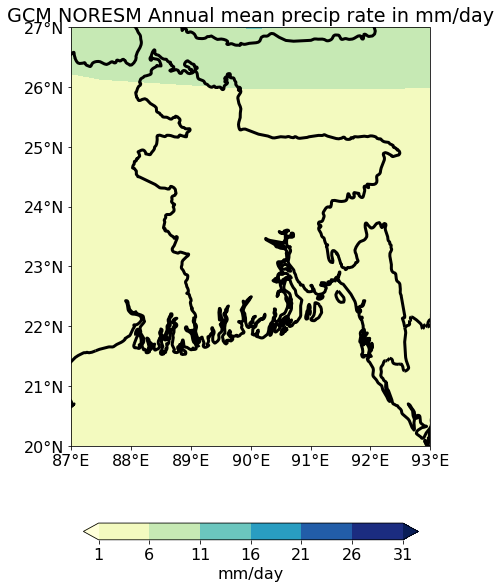

In [14]:
# Plotting annual_pr_mean

#plotting with cartopy
import cartopy.feature as cfeature


fig = plt.figure(figsize=(12,9.5))

ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_extent([88,93,20,27])


m1 = ax.contourf(annual_pr_mm['lon'], annual_pr_mm['lat'],annual_pr_mm,
                 np.arange(1,35+1,5),transform = ccrs.PlateCarree(),cmap='YlGnBu',extend='both')

 
# Define the xticks for longitude
ax.set_xticks(np.arange(87,94,1), crs=ccrs.PlateCarree())
lon_formatter = cticker.LongitudeFormatter()
ax.xaxis.set_major_formatter(lon_formatter)

# Define the yticks for latitude
ax.set_yticks(np.arange(20,28,1), crs=ccrs.PlateCarree())
lat_formatter = cticker.LatitudeFormatter()
ax.yaxis.set_major_formatter(lat_formatter)


plt.colorbar(m1, orientation = 'horizontal',shrink=0.5, fraction = 0.04 , label = 'mm/day')
ax.coastlines(linewidth=3)
ax.add_feature(cfeature.BORDERS,linewidth=3)

#plt.title('GCM NORESM Annual mean precip rate in mm/day',fontweight='bold', fontsize=15)

plt.title('GCM NORESM Annual mean precip rate in mm/day')

plt.savefig("/home/mkibria/Academic/pr_of_thesis/figures/bd_pr_gcm_noresm_annual_mean.png")




